In [15]:
import torch
import numpy as np
import pandas as pd

# Create tensors

In [16]:
# 0-d tensor, scalar
age = torch.tensor(32)
print(age)
print(age.shape)

tensor(32)
torch.Size([])


In [17]:
age_1 = torch.tensor([32]) # Actually this is vector of size 1.
print(age_1)
print(age_1.shape)

tensor([32])
torch.Size([1])


In [18]:
# 1-d tensor, vector
ages = torch.tensor([32, 20, 25])
print(ages)
print(ages.shape)

tensor([32, 20, 25])
torch.Size([3])


In [19]:
# 2-d tensor, matrix
randon_matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(randon_matrix)
print(randon_matrix.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [20]:
# create an random tensor from a standard guassian distribution
randon_matrix_guassion = torch.randn(2, 3) # Normal distribution, mean=0, std=1
print(randon_matrix_guassion)
print(randon_matrix_guassion.shape)
print(randon_matrix_guassion.dtype)
# https://docs.pytorch.org/docs/stable/generated/torch.randn.html#torch.randn

tensor([[ 0.7684, -0.1491, -0.4705],
        [-0.0808,  0.6102,  0.1148]])
torch.Size([2, 3])
torch.float32


# Convert numpy array to tensor

In [21]:
# create a tensor from numpy array
numpy_array = np.array([1, 2, 3])
tensor_from_np = torch.tensor(numpy_array)

In [22]:
print(numpy_array)

[1 2 3]


In [23]:
print(tensor_from_np)

tensor([1, 2, 3])


In [24]:
print(randon_matrix.dtype)
# PyTorch supports all kinds of types
# https://docs.pytorch.org/docs/stable/tensors.html

torch.int64


In [25]:
torch.from_numpy(numpy_array)

tensor([1, 2, 3])

# Convert pandas dataframe to tensor

In [26]:
# random dataframes
data = {
    'name': ['John', 'Anna', 'Peter', 'Linda'],
    'age': [32, 20, 25, 40],
    'city': ['New York', 'Paris', 'Berlin', 'London']
}

df_data = pd.DataFrame(data)

In [27]:
print(df_data)

    name  age      city
0   John   32  New York
1   Anna   20     Paris
2  Peter   25    Berlin
3  Linda   40    London


In [28]:
# cover the dataframe to tensor
tensor_from_df = torch.tensor(df_data.loc[:, ['age']].values)

In [29]:
print(tensor_from_df)

tensor([[32],
        [20],
        [25],
        [40]])


# Read an image and cover it to tensor

In [30]:
# 3-d tensor
# read a cat image and convert it to tensor
from PIL import Image
cat = Image.open('../example_data/cat.jpg')
cat_array = np.array(cat)
cat_tensor = torch.tensor(cat_array)

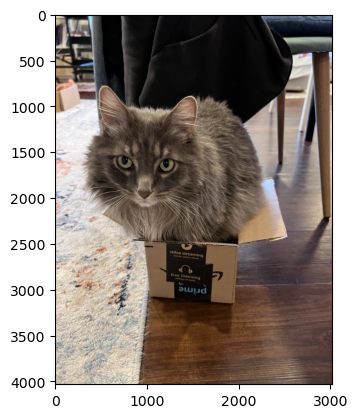

In [31]:
# print image first
import matplotlib.pyplot as plt
# roate the image clockwise 90 degree
plt.imshow(np.rot90(cat_array, -1))
# plt.imshow(cat_array)

Text(0.5, 1.0, 'Blue Channel')

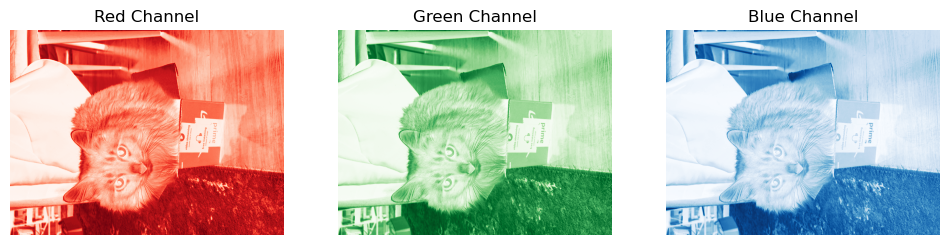

In [32]:
r, g, b = cat.split()

# Display each channel
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(r, cmap='Reds')
axes[0].axis('off')
axes[0].set_title('Red Channel')

axes[1].imshow(g, cmap='Greens')
axes[1].axis('off')
axes[1].set_title('Green Channel')

axes[2].imshow(b, cmap='Blues')
axes[2].axis('off')
axes[2].set_title('Blue Channel')

In [33]:
print(cat_array.shape)
# Weight, Hight, Channel numbers

(3024, 4032, 3)


In [34]:
print(cat_tensor)

tensor([[[110, 135, 165],
         [108, 133, 163],
         [116, 141, 171],
         ...,
         [ 70,  52,  48],
         [ 68,  50,  46],
         [ 74,  56,  52]],

        [[103, 128, 158],
         [103, 128, 158],
         [113, 138, 168],
         ...,
         [ 69,  51,  47],
         [ 69,  51,  47],
         [ 74,  56,  52]],

        [[101, 126, 156],
         [100, 125, 155],
         [107, 132, 162],
         ...,
         [ 70,  52,  48],
         [ 72,  54,  50],
         [ 74,  56,  52]],

        ...,

        [[ 68,  70,  69],
         [ 72,  74,  73],
         [ 77,  77,  77],
         ...,
         [221, 209, 193],
         [212, 203, 188],
         [206, 196, 184]],

        [[ 62,  64,  63],
         [ 67,  69,  68],
         [ 74,  74,  74],
         ...,
         [224, 212, 196],
         [212, 203, 188],
         [204, 194, 182]],

        [[ 67,  69,  68],
         [ 72,  72,  72],
         [ 75,  75,  75],
         ...,
         [225, 213, 199],
        

In [35]:
print(cat_tensor.shape)
# height, width, channels

torch.Size([3024, 4032, 3])


In [36]:
# 4d tensor
two_cats = torch.stack([cat_tensor, cat_tensor], dim=0)
print(two_cats.shape)

torch.Size([2, 3024, 4032, 3])


In [37]:
from torchvision.io import read_image

In [38]:
cat_tensor_2 = read_image('../example_data/cat.jpg')

In [39]:
cat_tensor_2.shape

torch.Size([3, 3024, 4032])

In [40]:
# purmute the tensor
# Rearranges the order of dimensions arbitrarily.
cat_tensor_permute = cat_tensor.permute(2, 0, 1)
# torch.einsum is another powerful tool for tensor operations. It allows us to perform tensor operations using a more concise syntax.

In [41]:
cat_tensor_permute.shape

torch.Size([3, 3024, 4032])

# Tensor operation

In [42]:
example_tensor = torch.arange(1, 16).reshape(5,3)
print(example_tensor)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


In [43]:
# tensor transpose
example_tensor_T = example_tensor.T

In [44]:
print(example_tensor_T)

tensor([[ 1,  4,  7, 10, 13],
        [ 2,  5,  8, 11, 14],
        [ 3,  6,  9, 12, 15]])


In [45]:
example_tensor.permute(1, 0)

tensor([[ 1,  4,  7, 10, 13],
        [ 2,  5,  8, 11, 14],
        [ 3,  6,  9, 12, 15]])

In [46]:
# reshape matrix 
example_tensor.reshape(-1, 15)
# -1 means that the other dimension will be inferred from the remaining dimensions.

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

## Slicing matrix

In [47]:
# a element
print(example_tensor[1, 2])

tensor(6)


In [48]:
# a row
print(example_tensor[1, :])

tensor([4, 5, 6])


In [49]:
# a column
print(example_tensor[:, 1])

tensor([ 2,  5,  8, 11, 14])


In [50]:
# a submatrix
print(example_tensor[1:3, 1:2])

tensor([[5],
        [8]])


## Reduction

In [51]:
example_tensor

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])

In [52]:
example_tensor.sum()

tensor(120)

In [53]:
# To sum over all elements along the rows
example_tensor.sum(axis=0)
# same as example_tensor(dim=0)

tensor([35, 40, 45])

In [54]:
# To sum over all elements along the columns
example_tensor.sum(axis=1)

tensor([ 6, 15, 24, 33, 42])

In [55]:
# change example_tensor to float
example_tensor_float = example_tensor.type(torch.float64)

In [56]:
example_tensor_float.mean()

tensor(8., dtype=torch.float64)

In [57]:
example_tensor_float.mean(dim=0)

tensor([7., 8., 9.], dtype=torch.float64)

In [58]:
example_tensor_float.mean(dim=1)

tensor([ 2.,  5.,  8., 11., 14.], dtype=torch.float64)

## Non-Reduction operations

In [59]:
example_tensor.sum(dim=0).shape

torch.Size([3])

In [60]:
example_tensor.sum(dim=0, keepdim=True).shape

torch.Size([1, 3])

In [61]:
example_tensor_float.mean(dim=0).shape

torch.Size([3])

In [62]:
example_tensor_float.mean(dim=0, keepdim=True).shape

torch.Size([1, 3])

## Matrix operations

### Matrix–Vector Products

In [63]:
vector = torch.tensor([3, 4, 5])
print(vector.shape)

torch.Size([3])


In [64]:
res_1 = example_tensor@vector
print(res_1)
print(res_1.shape)

tensor([ 26,  62,  98, 134, 170])
torch.Size([5])


In [65]:
res_2 = example_tensor.mv(vector)
print(res_2)
print(res_2.shape)

tensor([ 26,  62,  98, 134, 170])
torch.Size([5])


In [66]:
res_3 = torch.mv(example_tensor, vector)
print(res_3)
print(res_3.shape)

tensor([ 26,  62,  98, 134, 170])
torch.Size([5])


### Matrix multiplication 

In [67]:
example_tensor.shape

torch.Size([5, 3])

In [68]:
example_tensor.T.shape

torch.Size([3, 5])

In [69]:
# Dot product
res_1 = example_tensor@example_tensor.T
print(res_1)
print(res_1.shape)

tensor([[ 14,  32,  50,  68,  86],
        [ 32,  77, 122, 167, 212],
        [ 50, 122, 194, 266, 338],
        [ 68, 167, 266, 365, 464],
        [ 86, 212, 338, 464, 590]])
torch.Size([5, 5])


In [70]:
# Dot product by tensor.mm
res_2 = example_tensor.mm(example_tensor.T)
print(res_2)
print(res_2.shape)

tensor([[ 14,  32,  50,  68,  86],
        [ 32,  77, 122, 167, 212],
        [ 50, 122, 194, 266, 338],
        [ 68, 167, 266, 365, 464],
        [ 86, 212, 338, 464, 590]])
torch.Size([5, 5])


In [71]:
res_3 = torch.mm(example_tensor, example_tensor.T)
print(res_3)
print(res_3.shape)

tensor([[ 14,  32,  50,  68,  86],
        [ 32,  77, 122, 167, 212],
        [ 50, 122, 194, 266, 338],
        [ 68, 167, 266, 365, 464],
        [ 86, 212, 338, 464, 590]])
torch.Size([5, 5])


In [72]:
# torch.matmul will automatically figure out the dtype, you may get some unexpected results. Use it carefully
res_4 = example_tensor.matmul(example_tensor.T)
print(res_4)
print(res_4.shape)

tensor([[ 14,  32,  50,  68,  86],
        [ 32,  77, 122, 167, 212],
        [ 50, 122, 194, 266, 338],
        [ 68, 167, 266, 365, 464],
        [ 86, 212, 338, 464, 590]])
torch.Size([5, 5])


In [73]:
# Dot product
res_6 = example_tensor @ example_tensor.T

# PyTorch Matrix Operations - dot, mm, matmul, @, and *

This tutorial explains the key differences between various matrix operations in PyTorch and when to use each one.

## 1. torch.dot(a, b) - Vector Dot Product

**Purpose**: Computes the dot product of two 1D tensors (vectors)

**Input Requirements**: 
- Both inputs must be 1D tensors
- Both tensors must have the same length

**Output**: A scalar (0D tensor)

**Mathematical Formula**: `dot(a, b) = a[0]*b[0] + a[1]*b[1] + ... + a[n]*b[n]`


In [74]:
# Example: torch.dot()
vector_a = torch.tensor([1.0, 2.0, 3.0])
vector_b = torch.tensor([4.0, 5.0, 6.0])

print("Vector A:", vector_a)
print("Vector B:", vector_b)
print("Shapes:", vector_a.shape, vector_b.shape)

# Compute dot product
dot_result = torch.dot(vector_a, vector_b)
print("torch.dot(a, b):", dot_result)
print("Manual calculation: 1*4 + 2*5 + 3*6 =", 1*4 + 2*5 + 3*6)
print("Result shape:", dot_result.shape)  # Should be torch.Size([])

Vector A: tensor([1., 2., 3.])
Vector B: tensor([4., 5., 6.])
Shapes: torch.Size([3]) torch.Size([3])
torch.dot(a, b): tensor(32.)
Manual calculation: 1*4 + 2*5 + 3*6 = 32
Result shape: torch.Size([])


## 2. torch.mm(A, B) - Standard Matrix Multiplication

**Purpose**: Performs standard linear algebra matrix multiplication

**Input Requirements**: 
- Both inputs must be 2D tensors (matrices)
- The number of columns in A must equal the number of rows in B
- Shape requirement: `(m, k) × (k, n) → (m, n)`

**Output**: A 2D tensor

**Mathematical Formula**: Standard matrix multiplication where `C[i,j] = Σ(A[i,k] * B[k,j])`

In [75]:
# Example: torch.mm()
matrix_A = torch.tensor([[1.0, 2.0, 3.0],
                         [4.0, 5.0, 6.0]])
matrix_B = torch.tensor([[7.0, 8.0],
                         [9.0, 10.0],
                         [11.0, 12.0]])

print("Matrix A:")
print(matrix_A)
print("Shape:", matrix_A.shape)  # (2, 3)

print("\nMatrix B:")
print(matrix_B)
print("Shape:", matrix_B.shape)  # (3, 2)

# Matrix multiplication
mm_result = torch.mm(matrix_A, matrix_B)
print("\ntorch.mm(A, B):")
print(mm_result)
print("Result shape:", mm_result.shape)  # (2, 2)

# Verify with manual calculation for first element
print("\nManual verification for result[0,0]:")
print("1*7 + 2*9 + 3*11 =", 1*7 + 2*9 + 3*11)

Matrix A:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])

Matrix B:
tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])
Shape: torch.Size([3, 2])

torch.mm(A, B):
tensor([[ 58.,  64.],
        [139., 154.]])
Result shape: torch.Size([2, 2])

Manual verification for result[0,0]:
1*7 + 2*9 + 3*11 = 58


## 3. A @ B - Matrix Multiplication Operator

**Purpose**: Python's matrix multiplication operator, equivalent to `torch.mm()` for 2D tensors

**Input Requirements**: 
- Primarily for 2D tensors
- Same shape requirements as `torch.mm()`
- Also works with higher-dimensional tensors (similar to `torch.matmul()`)

**Output**: A tensor (usually 2D for matrix inputs)

**Relationship**: `A @ B` is equivalent to `torch.mm(A, B)` for 2D tensors

In [76]:
# Example: @ operator
# Using the same matrices from previous example
at_result = matrix_A @ matrix_B

print("A @ B:")
print(at_result)
print("Result shape:", at_result.shape)

# Verify they are identical
print("\nAre torch.mm() and @ identical?", torch.equal(mm_result, at_result))

# @ operator also works with vectors (like torch.matmul)
vec1 = torch.tensor([1.0, 2.0, 3.0])
vec2 = torch.tensor([4.0, 5.0, 6.0])
vec_result = vec1 @ vec2
print("\nVector @ Vector:", vec_result)
print("Same as torch.dot?", torch.equal(vec_result, torch.dot(vec1, vec2)))

A @ B:
tensor([[ 58.,  64.],
        [139., 154.]])
Result shape: torch.Size([2, 2])

Are torch.mm() and @ identical? True

Vector @ Vector: tensor(32.)
Same as torch.dot? True


## 4. torch.matmul(A, B) - General Matrix Multiplication

**Purpose**: Universal matrix multiplication function that handles various tensor dimensions

**Input Requirements**: 
- Works with tensors of different dimensions
- Automatically handles broadcasting for batch operations
- More flexible than `torch.mm()`

**Behavior by Input Dimensions**:
- 1D × 1D: Returns scalar (like `torch.dot`)
- 2D × 2D: Returns 2D tensor (like `torch.mm`)
- Higher dimensions: Broadcasts over batch dimensions

**Output**: Variable depending on input dimensions

**Caution**: Can be unpredictable due to automatic dimension handling

**Use Cases**: 
- Batch matrix operations
- When working with tensors of varying dimensions
- General-purpose matrix multiplication

In [77]:
# Example: torch.matmul()

print("=== torch.matmul() with different input dimensions ===")

# 1D × 1D (like torch.dot)
vec_a = torch.tensor([1.0, 2.0, 3.0])
vec_b = torch.tensor([4.0, 5.0, 6.0])
matmul_1d = torch.matmul(vec_a, vec_b)
print("1D × 1D:", matmul_1d, "Shape:", matmul_1d.shape)

# 2D × 2D (like torch.mm)
matmul_2d = torch.matmul(matrix_A, matrix_B)
print("2D × 2D shape:", matmul_2d.shape)
print("Same as torch.mm?", torch.equal(matmul_2d, mm_result))

# Batch operations (3D tensors)
batch_A = torch.randn(4, 2, 3)  # 4 batches of 2×3 matrices
batch_B = torch.randn(4, 3, 2)  # 4 batches of 3×2 matrices
batch_result = torch.matmul(batch_A, batch_B)
print("Batch operation shape: {} × {} → {}".format(batch_A.shape, batch_B.shape, batch_result.shape))

# Broadcasting example
single_A = torch.randn(2, 3)    # Single 2×3 matrix
batch_B2 = torch.randn(5, 3, 4) # 5 batches of 3×4 matrices
broadcast_result = torch.matmul(single_A, batch_B2)
print("Broadcasting shape: {} × {} → {}".format(single_A.shape, batch_B2.shape, broadcast_result.shape))

=== torch.matmul() with different input dimensions ===
1D × 1D: tensor(32.) Shape: torch.Size([])
2D × 2D shape: torch.Size([2, 2])
Same as torch.mm? True
Batch operation shape: torch.Size([4, 2, 3]) × torch.Size([4, 3, 2]) → torch.Size([4, 2, 2])
Broadcasting shape: torch.Size([2, 3]) × torch.Size([5, 3, 4]) → torch.Size([5, 2, 4])


## 5. A * B - Element-wise Multiplication (Hadamard Product)

**Purpose**: Multiplies corresponding elements of two tensors

**Input Requirements**: 
- Tensors must have compatible shapes for broadcasting
- Not restricted to specific dimensions

**Output**: Tensor with the same shape as the broadcasted inputs

**Mathematical Formula**: `C[i,j] = A[i,j] * B[i,j]` (element by element)

**Key Difference**: This is NOT matrix multiplication in the linear algebra sense

**Use Cases**: 
- Element-wise scaling
- Masking operations
- Component-wise operations in neural networks

In [78]:
# Example: Element-wise multiplication (*)

print("=== Element-wise multiplication ===")

# Same-shaped tensors
tensor_A = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor_B = torch.tensor([[7, 8, 9],
                         [10, 11, 12]])

elementwise_result = tensor_A * tensor_B
print("Tensor A:")
print(tensor_A)
print("Tensor B:")
print(tensor_B)
print("A * B (element-wise):")
print(elementwise_result)
print("Result shape:", elementwise_result.shape)

# Compare with matrix multiplication
print("\n=== Comparison: Element-wise vs Matrix multiplication ===")
square_A = torch.tensor([[1, 2],
                         [3, 4]])
square_B = torch.tensor([[5, 6],
                         [7, 8]])

print("Matrix A:")
print(square_A)
print("Matrix B:")
print(square_B)

element_result = square_A * square_B
matrix_result = square_A @ square_B

print("Element-wise (A * B):")
print(element_result)
print("Matrix multiplication (A @ B):")
print(matrix_result)

# Broadcasting example
scalar = 2.0
vector = torch.tensor([1, 2, 3])
broadcast_result = vector * scalar
print("\nBroadcasting: [1, 2, 3] * 2.0 =", broadcast_result)

=== Element-wise multiplication ===
Tensor A:
tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor B:
tensor([[ 7,  8,  9],
        [10, 11, 12]])
A * B (element-wise):
tensor([[ 7, 16, 27],
        [40, 55, 72]])
Result shape: torch.Size([2, 3])

=== Comparison: Element-wise vs Matrix multiplication ===
Matrix A:
tensor([[1, 2],
        [3, 4]])
Matrix B:
tensor([[5, 6],
        [7, 8]])
Element-wise (A * B):
tensor([[ 5, 12],
        [21, 32]])
Matrix multiplication (A @ B):
tensor([[19, 22],
        [43, 50]])

Broadcasting: [1, 2, 3] * 2.0 = tensor([2., 4., 6.])


## Summary: Quick Comparison Table

| Operation | Input Requirements | Output | Mathematical Operation | Use Case |
|-----------|-------------------|---------|----------------------|----------|
| `torch.dot(a, b)` | 1D tensors, same length | Scalar | Vector inner product | Similarity, projections |
| `torch.mm(A, B)` | 2D tensors, A_cols = B_rows | 2D tensor | Matrix multiplication | Linear algebra, transformations |
| `A @ B` | Primarily 2D tensors | 2D tensor | Matrix multiplication | Modern syntax for matrix mult |
| `torch.matmul(A, B)` | Any dimensions | Variable | Generalized multiplication | Batch operations, flexible dims |
| `A * B` | Compatible shapes | Same shape | Element-wise product | Scaling, masking, Hadamard product |

## When to Use Each Operation

### Use `torch.dot()` when:
- Computing dot product of two vectors
- Calculating cosine similarity
- Vector projections

### Use `torch.mm()` or `@` when:
- Standard matrix multiplication
- Linear layer computations in neural networks
- You want explicit 2D matrix operations

### Use `torch.matmul()` when:
- Working with batched matrices
- Need automatic broadcasting
- Handling tensors of varying dimensions

### Use `*` when:
- Element-wise operations
- Applying masks or weights
- Scaling tensor elements
- **NOT** for linear algebra matrix multiplication

In [79]:
# Comprehensive Example: All Operations in Action

print("=" * 60)
print("COMPREHENSIVE COMPARISON OF ALL OPERATIONS")
print("=" * 60)

# Test data
vec1 = torch.tensor([1.0, 2.0, 3.0])
vec2 = torch.tensor([4.0, 5.0, 6.0])

mat1 = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
mat2 = torch.tensor([[5.0, 6.0], [7.0, 8.0]])

print("Test vectors:")
print(f"vec1: {vec1}")
print(f"vec2: {vec2}")
print(f"\nTest matrices:")
print(f"mat1:\n{mat1}")
print(f"mat2:\n{mat2}")

print("\n" + "="*40)
print("1. VECTOR OPERATIONS")
print("="*40)

# torch.dot
dot_result = torch.dot(vec1, vec2)
print(f"torch.dot(vec1, vec2): {dot_result}")

# @ operator with vectors
at_vec_result = vec1 @ vec2
print(f"vec1 @ vec2: {at_vec_result}")

# torch.matmul with vectors
matmul_vec_result = torch.matmul(vec1, vec2)
print(f"torch.matmul(vec1, vec2): {matmul_vec_result}")

# Element-wise multiplication
elementwise_vec = vec1 * vec2
print(f"vec1 * vec2: {elementwise_vec}")

print(f"\nAll vector operations equal? {torch.equal(dot_result, at_vec_result) and torch.equal(dot_result, matmul_vec_result)}")

print("\n" + "="*40)
print("2. MATRIX OPERATIONS")
print("="*40)

# torch.mm
mm_result = torch.mm(mat1, mat2)
print(f"torch.mm(mat1, mat2):\n{mm_result}")

# @ operator with matrices
at_mat_result = mat1 @ mat2
print(f"mat1 @ mat2:\n{at_mat_result}")

# torch.matmul with matrices
matmul_mat_result = torch.matmul(mat1, mat2)
print(f"torch.matmul(mat1, mat2):\n{matmul_mat_result}")

# Element-wise multiplication
elementwise_mat = mat1 * mat2
print(f"mat1 * mat2 (element-wise):\n{elementwise_mat}")

print(f"\nMatrix mult operations equal? {torch.equal(mm_result, at_mat_result) and torch.equal(mm_result, matmul_mat_result)}")

print("\n" + "="*40)
print("3. SHAPE ANALYSIS")
print("="*40)

print(f"dot product shape: {dot_result.shape}")
print(f"matrix multiplication shape: {mm_result.shape}")
print(f"element-wise multiplication shape: {elementwise_mat.shape}")

print("\n" + "="*40)
print("4. COMMON MISTAKES TO AVOID")
print("="*40)

print("✗ Using * for matrix multiplication:")
print(f"  mat1 * mat2 ≠ mat1 @ mat2")
print(f"  {torch.equal(elementwise_mat, mm_result)}")

print("\n✗ Using torch.dot for matrices:")
try:
    torch.dot(mat1.flatten(), mat2.flatten())
    print("  torch.dot works with flattened matrices but gives wrong result")
except Exception as e:
    print(f"  Error: {e}")

print("\n✓ Correct usage summary:")
print("  - Vectors: use torch.dot() or @")
print("  - Matrices: use torch.mm() or @")  
print("  - Batch ops: use torch.matmul()")
print("  - Element-wise: use *")

COMPREHENSIVE COMPARISON OF ALL OPERATIONS
Test vectors:
vec1: tensor([1., 2., 3.])
vec2: tensor([4., 5., 6.])

Test matrices:
mat1:
tensor([[1., 2.],
        [3., 4.]])
mat2:
tensor([[5., 6.],
        [7., 8.]])

1. VECTOR OPERATIONS
torch.dot(vec1, vec2): 32.0
vec1 @ vec2: 32.0
torch.matmul(vec1, vec2): 32.0
vec1 * vec2: tensor([ 4., 10., 18.])

All vector operations equal? True

2. MATRIX OPERATIONS
torch.mm(mat1, mat2):
tensor([[19., 22.],
        [43., 50.]])
mat1 @ mat2:
tensor([[19., 22.],
        [43., 50.]])
torch.matmul(mat1, mat2):
tensor([[19., 22.],
        [43., 50.]])
mat1 * mat2 (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])

Matrix mult operations equal? True

3. SHAPE ANALYSIS
dot product shape: torch.Size([])
matrix multiplication shape: torch.Size([2, 2])
element-wise multiplication shape: torch.Size([2, 2])

4. COMMON MISTAKES TO AVOID
✗ Using * for matrix multiplication:
  mat1 * mat2 ≠ mat1 @ mat2
  False

✗ Using torch.dot for matrices:
  torch.dot wor